# Detecção de Fraudes em Cartões de Crédito

Este projeto visa abordar a questão das fraudes com cartões de crédito, que é uma das principais preocupações de instituições financeiras como bancos e *fintechs*. No último ano, aproximadamente 12,1 milhões de pessoas foram vítimas de fraude financeira, apenas no Brasil. Para resumir, os golpes financeiros causaram prejuízos anuais de mais de R$ 1,8 bilhão nos últimos 12 meses.

<p align=center>
<img src="https://th.bing.com/th/id/OIG1.QuVRXmxERa3um7YNiLG8?w=1024&h=1024&rs=1&pid=ImgDetMain" width="50%"></p>

Em relação a essas fraudes, as relacionadas a cartões de crédito são particularmente importantes porque a não detecção delas pode resultar em danos significativos tanto para o consumidor quanto para a instituição financeira.

A quantidade de falsos positivos também deve ser levada em consideração. Isso inclui situações em que você tentou fazer uma compra e seu cartão foi bloqueado preventivamente, o que provavelmente causou estresse e vergonha.

Por todos esses motivos, o investimento na área de detecção de fraudes com IA está crescendo a cada ano.

Um algoritmo de aprendizado de máquina apenas um pouco melhor que os anteriores pode economizar milhões de dólares se tiver uma base histórica de grandes volumes de dados. E esse é o problema, melhorar

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://th.bing.com/th/id/OIG4.4kyGABbCY8LC99PEvbDF?w=1024&h=1024&rs=1&pid=ImgDetMain" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score,confusion_matrix

# Balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


# Ajustar a opção de exibição de colunas
pd.set_option('display.max_columns', None)

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

## Análise Exploratória

Durante a análise exploratória, explorarei os dados para obter insights valiosos sobre o conjunto de dados em questão. As seguintes etapas serão realizadas:



*1. Visualização Inicial:*
  * Verificando as dimensões do dataset
  * Examinaremos as 5 primeiras entradas usando `df.head()` para entender a estrutura do conjunto de dados.
  * Usando `df.tail()` examinaremos as 5 últimas entradas
  * E também pegaremos uma amostragem aleatória utilizando `df.sample(5)`.

*2. Resumo Estatístico:*

  * Em seguida, calcularemos e apresentaremos um resumo estatístico do dataframe usando `df.describe()`, fornecendo uma visão geral das medidas centrais e da dispersão dos dados.

*3. Verificação de Valores Ausentes:*

  * Verificaremos se há valores ausentes no conjunto de dados para determinar a integridade dos dados.

*4. Balanceamento do Dataset:*

  * Utilizaremos um gráfico countplot para visualizar o balanceamento do dataset entre as classes de interesse.

*5. Histogramas:*

  * Plotaremos histogramas para as variáveis Time e Amount, distinguindo entre transações fraudulentas (Class == 1) e transações normais (Class == 0), fornecendo uma compreensão visual das distribuições dessas variáveis em diferentes cenários.

*6. Boxplot da Variável Amount para Fraudes:*

  * Para a variável Amount em transações fraudulentas (Class == 1), plotaremos um boxplot para identificar qualquer padrão ou comportamento incomum nos valores dessa variável em transações fraudulentas.


*7. Matriz de Correlação:*

  * Por fim, construiremos e analisaremos uma matriz de correlação para investigar as relações lineares entre as diferentes variáveis do conjunto de dados, ajudando a identificar possíveis padrões ou associações entre elas.

Essas etapas nos ajudarão a compreender melhor a natureza dos dados e a tomar decisões informadas durante as fases subsequentes da análise e modelagem.

## Funções Utilizadas

In [3]:
def printLogMatriz(modelo,y_teste,y_pred):
  conf_matrix = confusion_matrix(y_teste, y_pred)

  # Extraindo os valores da matriz
  TN, FP, FN, TP = conf_matrix.ravel()

  print(f"{modelo}\n")
  print(f"\t{TN}: Transações normais classificadas como normal",
        f"\t{FP}: Transações fraudulentas classificadas como normais\n",
        f"\t{FN}: Transações normais classificadas como fraudulentas",
        f"\t{TP}: Transações fraudulentas classificadas como fraudulentas")
  print('\n')

# 1. Visualização Inicial

Verificando as dimensões do dataset

In [4]:
print(
      f'Dimensões do Dataset \n{"-"*25}',
      f'\nCampos: {df.shape[1]}',
      f'\nRegistros: {df.shape[0]:,.0f}'.replace(',', '.')
)

Dimensões do Dataset 
------------------------- 
Campos: 31 
Registros: 284.807


Visualizando as 5 primeiras entradas

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Visualizando as 5 últimas entradas

In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Visualizando 5 entradas aleatórias

In [7]:
df.sample(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
52258,45356.0,0.793177,-0.960599,1.510272,1.741700,-1.411634,1.032858,-1.034622,0.527286,1.652768,-0.247049,-0.284326,0.665052,-1.527917,-0.618235,-2.111620,-0.147594,0.024882,0.572984,0.552659,0.059275,0.033138,0.181403,-0.258806,0.028961,0.473971,-0.233034,0.069068,0.047390,151.97,0
63274,50639.0,-0.961979,0.653526,2.338706,0.099298,-0.612462,0.270300,-0.106670,0.359417,0.750478,-0.327886,-0.929663,-0.697500,-1.709720,-0.246763,0.461280,-0.216158,0.221585,-0.320102,-0.194923,-0.054824,-0.018976,0.073283,-0.116204,0.071036,-0.221940,0.322080,0.067891,0.179016,11.50,0
150286,92965.0,-1.436790,0.711207,1.115652,-0.513290,0.104383,1.147821,-0.194646,0.751408,1.634756,-1.184163,0.308686,-2.158784,1.703601,1.396671,0.021704,-0.619625,1.233795,-0.978258,-1.681090,-0.268848,0.202986,1.036400,-0.054215,-1.026807,-0.299053,0.671629,-0.008416,0.135279,55.00,0
13049,22909.0,1.335907,0.501767,-2.023397,-0.103300,2.715848,2.855118,-0.264386,0.602807,0.986997,-1.022671,1.365558,-2.829359,1.496345,0.280129,0.420175,0.848923,1.269232,0.986256,-0.196450,0.010340,-0.357935,-0.878655,-0.106828,0.830453,0.707121,0.345415,-0.055198,0.029710,0.76,0
127740,78446.0,1.500884,-0.777699,-0.046680,-1.406742,-1.109538,-1.134692,-0.491096,-0.332552,-2.583043,1.643293,1.541236,0.209933,0.979712,0.033894,-0.520919,-0.673738,0.448421,0.086252,0.081465,-0.290558,-0.097968,0.117120,-0.078847,0.553720,0.647947,-0.115644,-0.002056,0.000219,15.00,0
99240,67030.0,0.945062,-0.362661,1.188028,1.582817,-0.525423,1.388663,-0.706711,0.584273,1.040083,-0.293000,0.761328,1.567198,-0.734940,-0.438195,-2.107329,-1.228932,0.830677,-1.266579,0.092422,-0.204719,-0.324659,-0.531375,0.085345,-0.300936,0.299197,-0.498369,0.097291,0.018536,34.99,0
192168,129572.0,1.946754,-0.581398,-0.233863,0.426496,-0.948617,-0.407090,-0.812064,0.146576,1.194853,0.230561,0.536613,0.267857,-1.473835,0.264982,-0.232421,0.506205,-0.593647,0.647456,-0.004209,-0.288064,0.234114,0.804711,0.151925,0.102158,-0.315001,0.593372,-0.035681,-0.061749,7.03,0


# 2. Resumo Estatístico

Verificando Estatísticas

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Verificando valores dentro da Class que representa se a transação foi marcada como Transação normal ou Fraudulenta

In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Confirmando que o tipo do campo `Class` é booleano é 0 ou 1
<br>

Printando o percentual de transações fraudulentas e transações normais

In [10]:
print('Fraudes Detectadas', round(df['Class'].value_counts()[1] / len(df) *100,2),'%')
print('Não é Fraude', round(df['Class'].value_counts()[0] / len(df) *100,2), '%')

Fraudes Detectadas 0.17 %
Não é Fraude 99.83 %


# 3. Verificação de Valores Ausentes

In [11]:
df.isnull().sum().max()

0

In [12]:
df.isna().sum().max()

0

# 4. Balanceamento do Dataset:

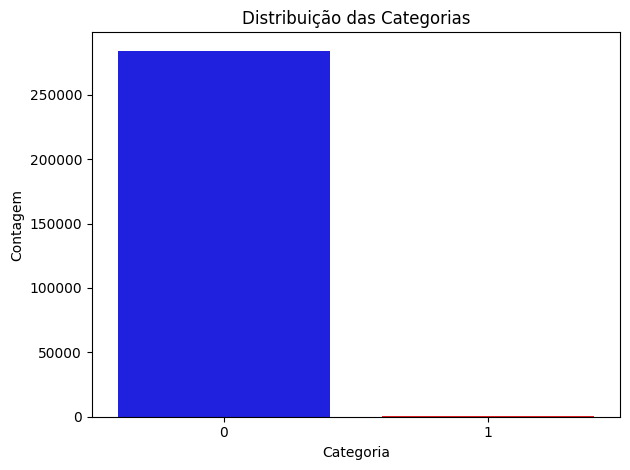

In [13]:
cores = ["#0000ff","#ff0000"]
sns.countplot(data=df, x='Class', hue='Class', palette=cores)

# Desativar a legenda
plt.legend([],[], frameon=False)

plt.title('Distribuição das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.tight_layout()

Como foi confirmado acima, há um desbalanceamento entre as transações fraudulentas comparadas com as transações normais, logo há a necessidade de balancear o conjunto de dados antes de passar para o modelo de machine learning.

# 5. Histogramas

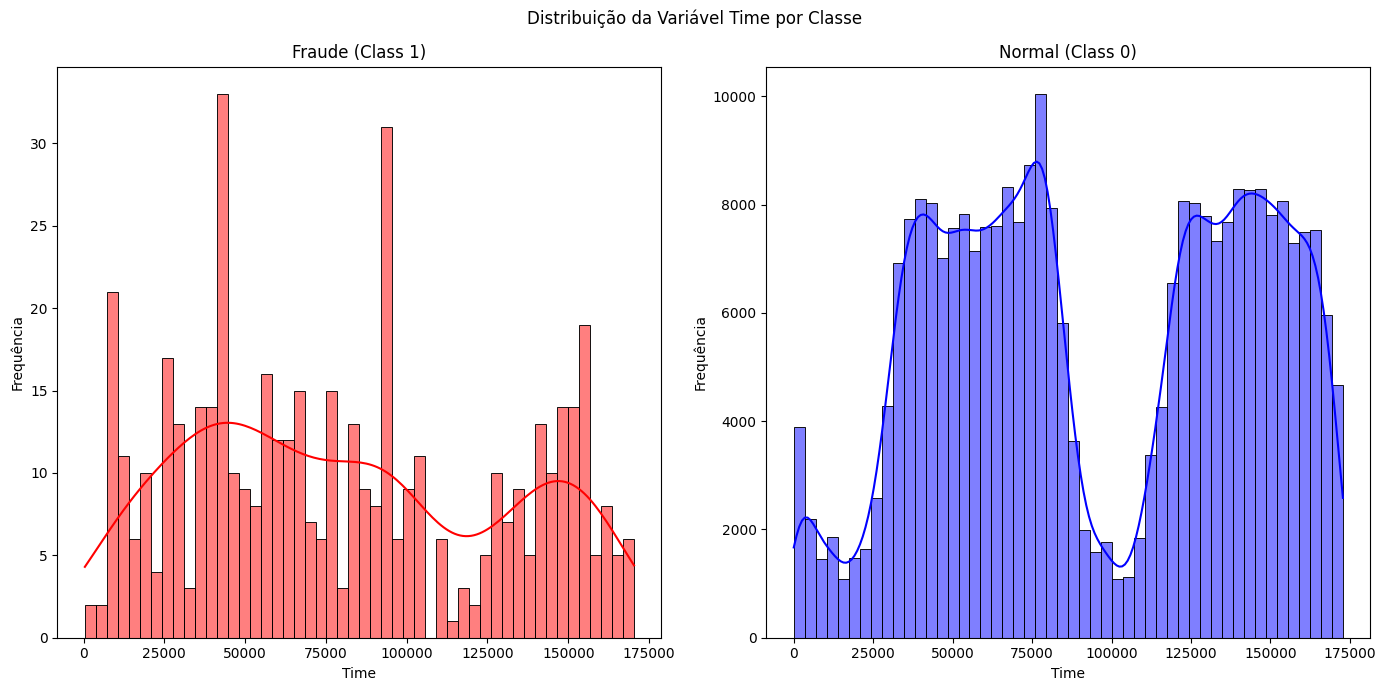

In [14]:
# Definir o tamanho da figura e número de subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Histograma para Fraude (Class == 1)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color=cores[1], kde=True, ax=axes[0])
axes[0].set_title('Fraude (Class 1)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequência')

# Histograma para Normal (Class == 0)
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color=cores[0], kde=True, ax=axes[1])
axes[1].set_title('Normal (Class 0)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequência')

# Adicionar título geral
fig.suptitle('Distribuição da Variável Time por Classe')

# Ajustar o layout
plt.tight_layout()

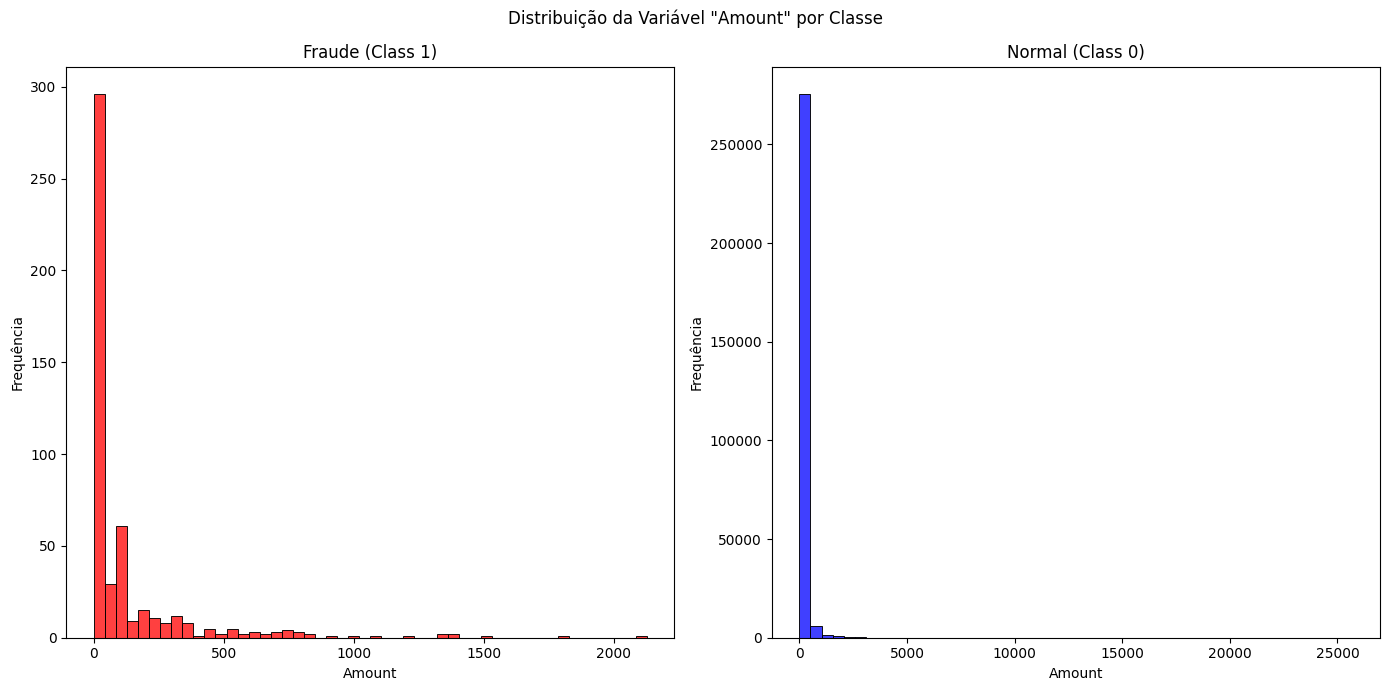

In [15]:
# Definir o tamanho da figura e número de subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Histograma para Fraude (Class == 1)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color=cores[1], ax=axes[0])
axes[0].set_title('Fraude (Class 1)')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequência')

# Histograma para Normal (Class == 0)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color=cores[0], ax=axes[1])
axes[1].set_title('Normal (Class 0)')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequência')

fig.suptitle('Distribuição da Variável "Amount" por Classe')
plt.tight_layout()

* Padrão de Gastos: Pode indicar que os fraudadores estão realizando transações de baixo valor para evitar detecção ou para testar se o cartão está ativo antes de fazer transações maiores.

* Tentativas de Fraude: Transações com valores muito baixos podem ser tentativas de fraude, onde os fraudadores estão testando o sistema ou realizando pequenas transações para obter informações ou recursos.

* Erros ou Dados Ausentes: Também é possível que valores baixos sejam devido a erros no processamento de dados ou a dados ausentes que foram preenchidos com zeros.

* Natureza das Transações: Dependendo do tipo de transações em seu conjunto de dados, transações legítimas de baixo valor também podem ser comuns (por exemplo, pequenas compras online).

# 6. Boxplot da Variável Amount para Fraudes:

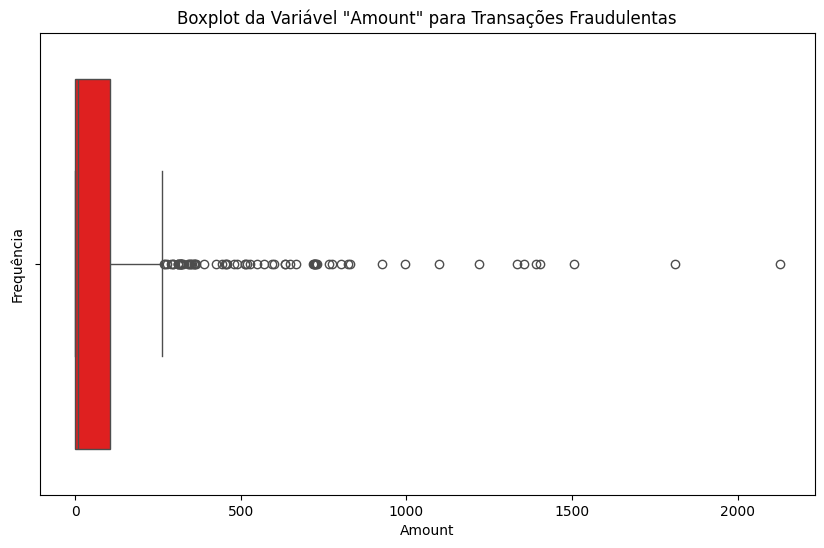

In [16]:
# Filtrar o dataframe para incluir apenas as transações fraudulentas
df_fraude = df[df['Class'] == 1]

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_fraude['Amount'], color='red')
plt.title('Boxplot da Variável "Amount" para Transações Fraudulentas')
plt.xlabel('Amount')
plt.ylabel('Frequência')
plt.show()

# 7. Matriz de Correlação

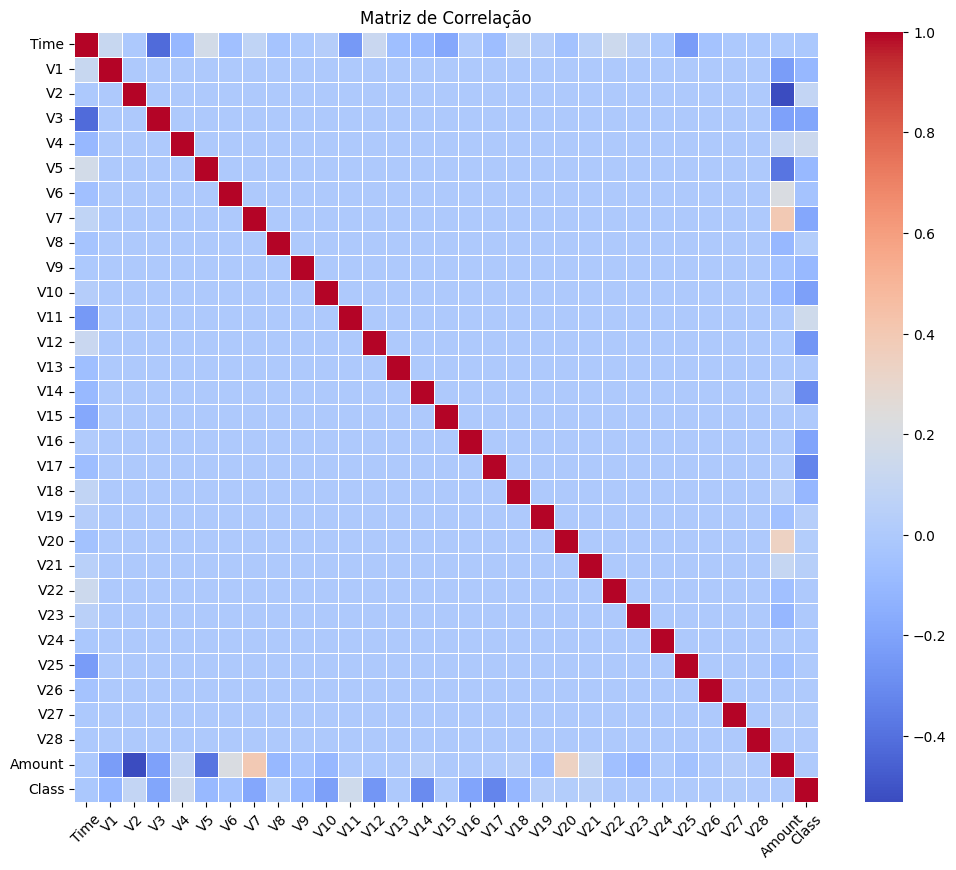

In [17]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Ajustar o tamanho da figura
plt.figure(figsize=(12, 10))

# Plotar a matriz de correlação
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Ajustar os rótulos dos eixos
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Matriz de Correlação')
plt.show()

# Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* Balancear o conjunto de dados

In [18]:
# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df.drop('Class', axis=1)
y = df['Class']

In [19]:
# Dividindo o conjunto de dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y, shuffle=True)

## Técnicas de Balanceando de dados

In [20]:
# Criar cópia do DataFrame
df_clean = df.copy()

# Criando uma instância do StandardScaler
scaler = StandardScaler()

In [21]:
# Padronizando a coluna Amount
df_clean['ScalerAmount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))

# Padronizando a coluna Time
df_clean['ScalerTime'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

In [22]:
# Excluindo as colunas com valores originais
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

### RUS (Random Under Sampling)

Nessa técnica, a classe majoritária (no caso de detecção de fraudes em cartões de crédito, as transações normais) é reduzida aleatoriamente para equilibrar o número de amostras entre as classes majoritária e minoritária.

In [23]:
# Definindo parâmetros
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [24]:
# Checar o balanceamento das classes
print(pd.Series(y_rus).value_counts())

Class
0    344
1    344
Name: count, dtype: int64


### SMOTE (Synthetic Minority Over-sampling Technique)

O SMOTE é uma técnica que gera exemplos sintéticos da classe minoritária para equilibrar o conjunto de dados. Ele cria novos pontos de dados interpolando entre exemplos existentes da classe minoritária.

In [25]:
# Criando uma instância do SMOTE
smote = SMOTE(random_state=42)

In [26]:
# Aplicando o SMOTE aos dados de treinamento
X_smote, y_smote= smote.fit_resample(X_train, y_train)

### **ADASYN (Adaptive Synthetic Sampling)**

Usada para lidar com conjuntos de dados desbalanceados, onde uma classe é significativamente menos representada do que a outra. O objetivo do ADASYN é gerar amostras sintéticas para a classe minoritária de forma adaptativa, dando mais peso às instâncias mais difíceis de aprender.

In [27]:
# Criando uma instância do ADASYN
adasyn = ADASYN(random_state=42)

# Aplicando o ADASYN aos dados de treinamento
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

## Modelo de Machine Learning


### **Aplicando as Técnicas de Balanceamentos nos modelos**



#### RUS

In [28]:
# Treinando o modelo de Regressão Logística com RUS
logistic_model_rus = LogisticRegression(random_state=42)
logistic_model_rus.fit(X_rus, y_rus)

# Previsões no conjunto de validação com RUS
y_val_pred_logistic_rus = logistic_model_rus.predict(X_val)
y_val_proba_logistic_rus = logistic_model_rus.predict_proba(X_val)[:, 1]

# Avaliação do modelo de Regressão Logística com RUS
print("Regressão Logística com RUS:")
print(classification_report(y_val, y_val_pred_logistic_rus))
print('ROC AUC:', roc_auc_score(y_val, y_val_proba_logistic_rus))

# Treinando o modelo de Árvore de Decisão com RUS
tree_model_rus = DecisionTreeClassifier(random_state=42, max_leaf_nodes=6)
tree_model_rus.fit(X_rus, y_rus)

# Previsões no conjunto de validação com RUS
y_val_pred_tree_rus = tree_model_rus.predict(X_val)
y_val_proba_tree_rus = tree_model_rus.predict_proba(X_val)[:, 1]

# Avaliação do modelo de Árvore de Decisão com RUS
print("Árvore de Decisão com RUS:")
print(classification_report(y_val, y_val_pred_tree_rus))
print('ROC AUC:', roc_auc_score(y_val, y_val_proba_tree_rus))

Regressão Logística com RUS:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.86      0.06       148

    accuracy                           0.95     85443
   macro avg       0.51      0.90      0.52     85443
weighted avg       1.00      0.95      0.97     85443

ROC AUC: 0.9432362722063173
Árvore de Decisão com RUS:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.03      0.86      0.06       148

    accuracy                           0.96     85443
   macro avg       0.52      0.91      0.52     85443
weighted avg       1.00      0.96      0.98     85443

ROC AUC: 0.9123662630330664


In [29]:
# Calculando a matriz de confusão
printLogMatriz("Regressão Logística com RUS",y_val,y_val_pred_logistic_rus)
printLogMatriz("Árvore de Decisão com RUS",y_val,y_val_pred_tree_rus)

Regressão Logística com RUS

	81098: Transações normais classificadas como normal 	4197: Transações fraudulentas classificadas como normais
 	21: Transações normais classificadas como fraudulentas 	127: Transações fraudulentas classificadas como fraudulentas


Árvore de Decisão com RUS

	81546: Transações normais classificadas como normal 	3749: Transações fraudulentas classificadas como normais
 	20: Transações normais classificadas como fraudulentas 	128: Transações fraudulentas classificadas como fraudulentas




#### Smote

In [30]:
# Treinando o modelo de Regressão Logística com SMOTE
logistic_model_smote = LogisticRegression(random_state=42)
logistic_model_smote.fit(X_smote, y_smote)

# Previsões no conjunto de validação com SMOTE
y_val_pred_logistic_smote = logistic_model_smote.predict(X_val)
y_val_proba_logistic_smote = logistic_model_smote.predict_proba(X_val)[:, 1]

# Avaliação do modelo de Regressão Logística com SMOTE
print("Regressão Logística com SMOTE:")
print(classification_report(y_val, y_val_pred_logistic_smote))
print('ROC AUC:', roc_auc_score(y_val, y_val_proba_logistic_smote))

# Treinando o modelo de Árvore de Decisão com SMOTE
tree_model_smote = DecisionTreeClassifier(random_state=42, max_leaf_nodes=6)
tree_model_smote.fit(X_smote, y_smote)

# Previsões no conjunto de validação com SMOTE
y_val_pred_tree_smote = tree_model_smote.predict(X_val)
y_val_proba_tree_smote = tree_model_smote.predict_proba(X_val)[:, 1]

# Avaliação do modelo de Árvore de Decisão com SMOTE
print("Árvore de Decisão com SMOTE:")
print(classification_report(y_val, y_val_pred_tree_smote))
print('ROC AUC:', roc_auc_score(y_val, y_val_proba_tree_smote))

Regressão Logística com SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.86      0.13       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.56     85443
weighted avg       1.00      0.98      0.99     85443

ROC AUC: 0.9448211532946864
Árvore de Decisão com SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.86      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.91      0.53     85443
weighted avg       1.00      0.97      0.98     85443

ROC AUC: 0.9419785149473291


In [31]:
# Calculando a matriz de confusão
printLogMatriz("Regressão Logística com SMOTE",y_val,y_val_pred_logistic_smote)
printLogMatriz("Árvore de Decisão com SMOTE",y_val,y_val_pred_tree_smote)

Regressão Logística com SMOTE

	83593: Transações normais classificadas como normal 	1702: Transações fraudulentas classificadas como normais
 	21: Transações normais classificadas como fraudulentas 	127: Transações fraudulentas classificadas como fraudulentas


Árvore de Decisão com SMOTE

	82551: Transações normais classificadas como normal 	2744: Transações fraudulentas classificadas como normais
 	21: Transações normais classificadas como fraudulentas 	127: Transações fraudulentas classificadas como fraudulentas




#### Adasyn

In [32]:
# Treinando o modelo de Regressão Logística com ADASYN
logistic_model_adasyn = LogisticRegression(random_state=42)
logistic_model_adasyn.fit(X_adasyn, y_adasyn)

# Previsões no conjunto de validação com ADASYN
y_val_pred_logistic_adasyn = logistic_model_adasyn.predict(X_val)
y_val_proba_logistic_adasyn = logistic_model_adasyn.predict_proba(X_val)[:, 1]

# Avaliação do modelo de Regressão Logística com ADASYN
print("Regressão Logística com ADASYN:")
print(classification_report(y_val, y_val_pred_logistic_adasyn))
print('ROC AUC:', roc_auc_score(y_val, y_val_proba_logistic_adasyn))

# Treinando o modelo de Árvore de Decisão com ADASYN
tree_model_adasyn = DecisionTreeClassifier(random_state=42, max_leaf_nodes=6)
tree_model_adasyn.fit(X_adasyn, y_adasyn)

# Previsões no conjunto de validação com ADASYN
y_val_pred_tree_adasyn = tree_model_adasyn.predict(X_val)
y_val_proba_tree_adasyn = tree_model_adasyn.predict_proba(X_val)[:, 1]

# Avaliação do modelo de Árvore de Decisão com ADASYN
print("Árvore de Decisão com adasyn:")
print(classification_report(y_val, y_val_pred_tree_adasyn))
print('ROC AUC:', roc_auc_score(y_val, y_val_proba_tree_adasyn))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regressão Logística com ADASYN:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.86      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.56     85443
weighted avg       1.00      0.98      0.99     85443

ROC AUC: 0.947115733471909
Árvore de Decisão com adasyn:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.84      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

ROC AUC: 0.9405612952186608


In [33]:
# Calculando a matriz de confusão
printLogMatriz("Regressão Logística com Adasyn",y_val,y_val_pred_logistic_adasyn)
printLogMatriz("Árvore de Decisão com Adasyn",y_val,y_val_pred_tree_adasyn)

Regressão Logística com Adasyn

	83491: Transações normais classificadas como normal 	1804: Transações fraudulentas classificadas como normais
 	21: Transações normais classificadas como fraudulentas 	127: Transações fraudulentas classificadas como fraudulentas


Árvore de Decisão com Adasyn

	83218: Transações normais classificadas como normal 	2077: Transações fraudulentas classificadas como normais
 	23: Transações normais classificadas como fraudulentas 	125: Transações fraudulentas classificadas como fraudulentas




## Avaliar o desempenho do modelo

* Identificar a melhor métrica para esse tipo de modelo

### **RUS**


Ao fazer uma comparação entre o modelo de Regressão Logística com RUS e o modelo de Árvore de Decisão com RUS, notamos algumas diferenças notáveis:

<ul>

<li>
A quantidade de falsos negativos aumentou no modelo de Regressão Logística com RUS em relação ao modelo de Árvore de Decisão com RUS. No modelo de Regressão Logística, foram registrados 125 falsos negativos, enquanto no modelo de Árvore de Decisão foram registrados 129.
</li>

<li>
O número estimado de fraudes no modelo de Regressão Logística com RUS foi de 148, enquanto o modelo de Árvore de Decisão com RUS foi de 129.
</li>

<li>
O modelo de Árvore de Decisão com RUS resultou em uma redução significativa na quantidade de falsos positivos em comparação ao modelo de Regressão Logística com RUS. No modelo de Árvore de Decisão, foram registrados 4462 falsos positivos, enquanto no modelo de Regressão Logística foram registrados 2735, resultando em uma redução de mais de 3200 casos. Isso implica que os clientes do banco que escolhessem o modelo de Árvore de Decisão seriam bloqueados menos vezes devido a falsos positivos.
</li>

<li>
o modelo de Árvore de Decisão com RUS obteve um excelente AUC (Área sob a Curva ROC) de 0.9404, embora não seja o melhor entre os dois modelos analisados.
</li>

</ul>

### Smote

Ao comparar o modelo de Regressão Logística com SMOTE com o modelo de Árvore de Decisão com SMOTE, observamos algumas diferenças significativas:

<ul>

<li>
A quantidade de falsos negativos aumentou no modelo de Regressão Logística com SMOTE em comparação com o modelo de Árvore de Decisão com SMOTE. No modelo de Regressão Logística, foram 127 falsos negativos, enquanto no modelo de Árvore de Decisão foram 127 também.
</li>

<li>
Ambos os modelos, tanto o de Regressão Logística com SMOTE quanto o de Árvore de Decisão com SMOTE, previram 148 casos de fraude.
</li>


<li>
No entanto, o modelo de Regressão Logística com SMOTE apresentou uma diminuição significativa na quantidade de falsos positivos em comparação com o modelo de Árvore de Decisão com SMOTE. No modelo de Regressão Logística, foram 1702 falsos positivos, enquanto no modelo de Árvore de Decisão foram 2744, representando uma redução de mais de 1000 casos. Isso significa que caso os tomadores de decisão opte por utilizar o modelo de Regressão Logística os clientes do banco teriam seus cartões bloqueados menos vezes devido a falsos positivos.
</li>


<li>
o modelo de Regressão Logística com SMOTE obteve um AUC (Área sob a Curva ROC) de 0.9448, que é um pouco melhor do que o do modelo de Árvore de Decisão com SMOTE, que teve um AUC de 0.9406.
</li>

</ul>

As análises demonstram que, embora o modelo de Regressão Logística com SMOTE tenha apresentado mais predições incorretas do tipo falso negativo em comparação com o modelo de Árvore de Decisão com SMOTE, houve uma notável melhora na capacidade do modelo de Regressão Logística de diminuir os falsos positivos. Isso resultou em uma experiência aprimorada para os clientes do banco.

### Adasyn

Ao comparar o modelo de Regressão Logística com ADASYN com o modelo de Árvore de Decisão com ADASYN, observamos as seguintes diferenças significativas:

<ul>
  <li>A quantidade de falsos negativos permaneceu consistente em ambos os modelos. Tanto o modelo de Regressão Logística com ADASYN quanto o modelo de Árvore de Decisão com ADASYN registraram 127 casos de falsos negativos.</li>
  <li>Ambos os modelos previram o mesmo número de casos de fraude, com 148 previsões de fraude para cada modelo.</li>
  <li>No entanto, houve uma diferença notável na quantidade de falsos positivos entre os dois modelos. O modelo de Regressão Logística com ADASYN registrou 1804 falsos positivos, enquanto o modelo de Árvore de Decisão com ADASYN teve 2077. Isso representa uma redução de mais de 270 casos de falsos positivos no modelo de Regressão Logística em comparação com o modelo de Árvore de Decisão. Portanto, optar pelo modelo de Regressão Logística com ADASYN pode resultar em menos bloqueios de cartões para clientes legítimos devido a falsos positivos.</li>
  <li>Além disso, em termos de AUC (Área sob a Curva ROC), o modelo de Regressão Logística com ADASYN obteve um valor de 0.9471, enquanto o modelo de Árvore de Decisão com ADASYN teve um AUC de 0.9406. Isso indica que o modelo de Regressão Logística com ADASYN teve um desempenho ligeiramente melhor na capacidade de distinguir entre transações normais e fraudulentas.</li>
</ul>

Em conclusão, estas análises ressaltam que o modelo de Regressão Logística com ADASYN apresenta uma redução significativa na quantidade de falsos positivos em comparação com o modelo de Árvore de Decisão com ADASYN, o que pode resultar em uma melhor experiência para os clientes do banco.

## Conclusão

Considerando que o objetivo principal é detectar fraudes de cartão, o modelo mais eficaz para o contexto é aquele que apresenta a melhor capacidade de identificar transações fraudulentas e ao mesmo tempo minimizasse os falsos positivos, para que não gere estresse e vergonha para clientes cujas transações deveriam ser classificadas como normal.

Na avaliação dos três modelos - Regressão Logística com SMOTE, Regressão Logística com ADASYN e Regressão Logística com RUS - foi constado que todos possuem taxas de recalls parecidas, no que se refere à eficácia na identificação de fraudes. Contudo, o modelo de Regressão Logística com ADASYN se sobressai por ter menos falsos positivos quando comparado aos demais modelos.

No cenário do modelo de Regressão Logística utilizando ADASYN, foram contabilizados 1804 casos de falsos positivos. Já nos demais modelos (Regressão Logística com SMOTE e Regressão Logística com RUS), foram registrados 1702 e 2735 falsos positivos, respectivamente. Isso indica que o modelo de Regressão Logística com ADASYN teve um desempenho superior ao identificar transações fraudulentas de forma precisa, sem incorrer em um alto índice de classificação equivocada de transações legítimas como fraudulentas.

Além do mais, o modelo de Regressão Logística utilizando ADASYN também demonstrou um AUC ligeiramente superior, indicando uma melhor habilidade geral do modelo em diferenciar entre transações legítimas e fraudulentas.

Portanto, com base nestas análises, o modelo de `Regressão Logística com ADASYN` é considerado o mais indicado para a detecção de fraudes em cartões.

**Referências**

https://sigmoidal.ai/estrategias-de-balanceamento-de-dados-em-machine-learning/

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b